# Solving a system of coupled differential equations

Solving a system of coupled differential equations:
$$
\frac{d\phi_1}{dx} - \cos(x) - \phi^2_1-\phi_2 + 1+x^2+\sin^2(x) = 0\\
\frac{d\phi_2}{dx} - 2x + (1+x^2)\sin(x) - \phi_1\phi_2 = 0\\
$$
with boundary conditions
$$
\phi_1(0)=0\quad and \quad \phi_2(0)=1
$$

In [ ]:
%%capture
!pip install elvet

In [1]:
import elvet
from elvet.math import sin, cos

## Computation

Split the domain into 3 partitions to train with different limits of the domain separately

In [2]:
domains = [elvet.box((0, x_max, 30 * x_max)) for x_max in range(1, 4)]

Solve the differential equations

In [3]:
def equation(x, phi, dphi):
    phi1, phi2 = phi[0], phi[1]
    dphi1, dphi2 = dphi[0,0], dphi[0,1]

    return (
        dphi1 - cos(x) - phi1**2 - phi2 + 1 + x**2 + sin(x)**2,
        dphi2 - 2 * x + (1 + x**2) * sin(x) - phi1 * phi2,
    )

bcs = [
    elvet.BC(0, lambda x, phi, dphi: phi[0]),
    elvet.BC(0, lambda x, phi, dphi: phi[1] - 1),
]

solver = elvet.solver(equation, bcs, domains[0],model=elvet.nn(1, 10, 2))

for domain in domains:
    solver.fit(50000, domain=domain,verbose=1)

 Elvet: epoch = 1, loss = 1.86e+00, elapsed time = 00:00:02
 Elvet: epoch = 10000, loss = 1.02e-05, elapsed time = 00:00:08
 Elvet: epoch = 20000, loss = 2.18e-06, elapsed time = 00:00:14
 Elvet: epoch = 30000, loss = 1.27e-06, elapsed time = 00:00:20
 Elvet: epoch = 40000, loss = 7.94e-07, elapsed time = 00:00:26
 Elvet: epoch = 50000, loss = 5.74e-07, elapsed time = 00:00:32
 Elvet: epoch = 1, loss = 2.93e-01, elapsed time = 00:00:00
 Elvet: epoch = 10000, loss = 1.23e-05, elapsed time = 00:00:06
 Elvet: epoch = 20000, loss = 5.57e-06, elapsed time = 00:00:11
 Elvet: epoch = 30000, loss = 4.31e-06, elapsed time = 00:00:17
 Elvet: epoch = 40000, loss = 3.42e-06, elapsed time = 00:00:23
 Elvet: epoch = 50000, loss = 2.73e-06, elapsed time = 00:00:29
 Elvet: epoch = 1, loss = 1.18e+00, elapsed time = 00:00:01
 Elvet: epoch = 10000, loss = 8.48e-05, elapsed time = 00:00:06
 Elvet: epoch = 20000, loss = 1.34e-05, elapsed time = 00:00:12
 Elvet: epoch = 30000, loss = 7.73e-06, elapsed time

**Summary of conventions for tensor shapes and indices** (in non-batch mode)

```python
x.shape == (1,)

# first derivative
dy.shape == (1, 2)
dy1_dx, dy2_dx = dy[0, 0], dy[0, 1]
```

## Checks

Plot the history of losses and the final loss density and predictions.

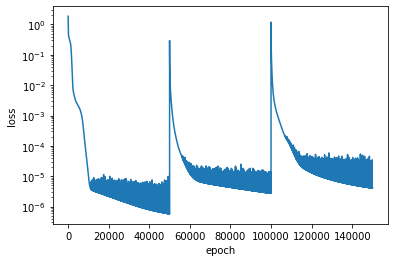

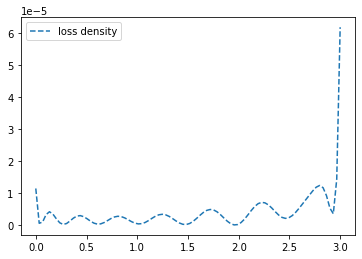

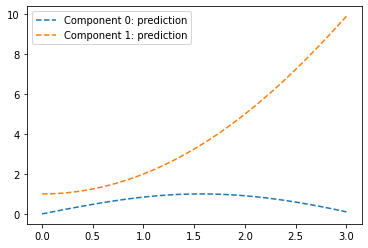

In [4]:
import elvet.plotting

elvet.plotting.plot_losses(solver)
elvet.plotting.plot_loss_density(solver)
elvet.plotting.plot_prediction(solver)